In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
# Есть 2 вектора
x = np.arange(1,11)
y = 2 * x + np.random.randn(10)*2
X = np.vstack((x,y))
print(X)

[[ 1.          2.          3.          4.          5.          6.
   7.          8.          9.         10.        ]
 [ 1.23477655  4.62462013  7.92565967  9.29789386  8.4618402  11.3966551
  13.92171667 15.49346112 19.38371322 20.14584859]]


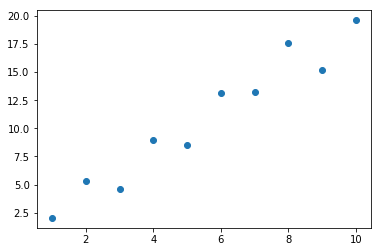

In [3]:
plt.scatter(X[0], X[1])
plt.show()

In [13]:
Xcentered = (X[0] - x.mean(), X[1] - y.mean())
m = (x.mean(), y.mean())
print(Xcentered)
print("Mean vector: ", m)

(array([-4.5, -3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5]), array([-9.95384196, -6.56399838, -3.26295884, -1.89072465, -2.72677831,
        0.20803659,  2.73309816,  4.30484261,  8.19509471,  8.95723008]))
Mean vector:  (5.5, 11.188618508992977)


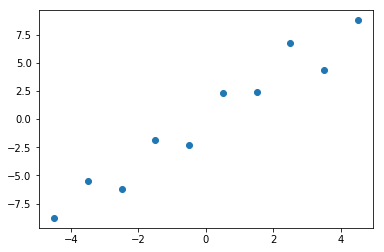

In [5]:
plt.scatter(Xcentered[0], Xcentered[1])
plt.show()

In [6]:
covmat = np.cov(Xcentered)
print(covmat, "\n")
print("Variance of X: ", np.cov(Xcentered)[0,0])
print("Variance of Y: ", np.cov(Xcentered)[1,1])
print("Covariance X and Y: ", np.cov(Xcentered)[0,1])

[[ 9.16666667 17.14953599]
 [17.14953599 34.03804226]] 

Variance of X:  9.166666666666666
Variance of Y:  34.038042256182806
Covariance X and Y:  17.149535985147907


In [7]:
_, vecs = np.linalg.eig(covmat)
v = -vecs[:,1]
Xnew = np.dot(v, Xcentered)
print(Xnew)

[-9.84276675 -6.50998353 -6.63506589 -2.33362142 -2.2876719   2.33038908
  2.85203856  7.12238061  5.44896475  9.8553365 ]


In [14]:
n = 5  #номер элемента случайной величины
Xrestored = np.dot(Xnew[n],v) + m
print('Restored: ', Xrestored)
print('Original: ', X[:,n])

Restored:  [ 6.55893308 13.26452169]
Original:  [ 6.        11.3966551]


In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
XPCAreduced = pca.fit_transform(np.transpose(X))

In [10]:
for xn, x_pca in zip(Xnew, XPCAreduced):
    print(xn, '-', x_pca)

-9.842766749718393 - [-9.84276675]
-6.509983529151356 - [-6.50998353]
-6.635065891626853 - [-6.63506589]
-2.333621423495896 - [-2.33362142]
-2.2876719009837516 - [-2.2876719]
2.330389081832168 - [2.33038908]
2.852038559938563 - [2.85203856]
7.122380610421103 - [7.12238061]
5.44896474594173 - [5.44896475]
9.855336496842682 - [9.8553365]
